In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Constants
from lib.mmsbm import MMSBM

train = "train.csv"
test = "test.csv"
sampling = 1
# Number of groups of users
k = 3
# Number of groups of items
l = 6
# Iterations
# To plateau the coefficients the minimum is 600
iterations = 300

In [3]:
mmsbm = MMSBM(
    train_set=train,
    test_set=test,
    user_groups=k,
    item_groups=l,
    iterations=iterations,
    sampling=sampling,
    seed=1714,
    notebook=True
)
return_dict = mmsbm.process()
s_prs, accuracy, mae, s2, s2pond, rat, lkh, theta, eta = mmsbm.postprocess(return_dict)

INFO:MMSBM:Running 1 runs of 300 iterations.
INFO:MMSBM:Done 1 runs in 1.80 minutes.
INFO:MMSBM:We had an accuracy of 0.23916020082154268, a MAE of 0.7496576905522592 and s2 and weighted s2 of 12579 and 10551.


In [4]:
temp = np.array(s_prs[0])
ev = pd.DataFrame(temp.reshape((temp.shape[0], temp.shape[1] * temp.shape[2] * temp.shape[3])))
ev["iteration"] = ev.index + 1
ev = ev.melt(id_vars="iteration", value_vars=list(ev.columns[:-1]))

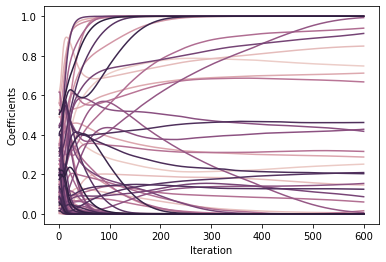

In [5]:
g = sns.lineplot(x="iteration", y="value", hue="variable", data=ev)
g.set(xlabel='Iteration', ylabel='Coefficients')
g.legend_.remove()

In [8]:
eta[0].shape

(10, 6)

In [7]:
s_prs[0]

[array([[[0.12185195, 0.22431686, 0.0582371 , 0.39484488, 0.20074921],
         [0.15730599, 0.15632386, 0.22631436, 0.34909756, 0.11095822],
         [0.02184691, 0.30095347, 0.27459259, 0.1611238 , 0.24148322],
         [0.19175368, 0.28476442, 0.28121677, 0.17668233, 0.0655828 ],
         [0.15465878, 0.18762961, 0.35599504, 0.14890843, 0.15280814],
         [0.17757628, 0.0836093 , 0.47799737, 0.04538644, 0.2154306 ]],
 
        [[0.04178318, 0.0730683 , 0.38222115, 0.27151895, 0.23140842],
         [0.28977154, 0.3574511 , 0.32671148, 0.02311844, 0.00294744],
         [0.35247234, 0.08369995, 0.05016084, 0.3333992 , 0.18026766],
         [0.05869252, 0.44031456, 0.03501084, 0.45233089, 0.01365119],
         [0.17159095, 0.21148131, 0.10226757, 0.33429196, 0.18036822],
         [0.13104706, 0.33566227, 0.2026775 , 0.18785033, 0.14276284]],
 
        [[0.16522146, 0.12842522, 0.22030563, 0.39463263, 0.09141506],
         [0.17137886, 0.08590229, 0.29283303, 0.284389  , 0.16549682],
